# Task 1 - 🕵️‍♀️ Exploratory data analysis

## 📚 Data
**Data Source**: The files `intakes.csv` and `outcomes.csv` contain data from an animal shelter in Austin, Texas, USA. The data is sourced from the official [City of Austin open data repository](https://data.austintexas.gov/).

The [intakes dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) contains information about animals admitted to the shelter from October 1, 2013, to April 27, 2022. The [outcomes dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) contains data about animals that left the shelter (e.g., through adoption or return to owners) during the same time period. It's possible that animals admitted before October 1, 2013, may not appear in `intakes.csv` (as data wasn't collected yet) but will have records in `outcomes.csv` if they left the shelter after that date.

☝️ Each dataset may contain the **same animal multiple times** due to instances where animals returned to the shelter. This can be a bit complicated if you intend to merge the datasets. However, for the purpose of this task, merging is not required. Additionally, there might be some duplicate records, which can be removed as they represent errors.

## Assignment
> ☝️ Use markdown cells! Explain all important steps, describe visualizations, and note any observations.

**✨ Data Preparation**
* Import the necessary packages.
* Load the datasets 'intakes' and 'outcomes' from the respective CSV files.
* Familiarize yourself with both datasets and comment on your findings:
  * Example information to gather: number of rows in the dataset, number and meaning of features, data types of features, number of unique values in each feature, ...
* Clean and convert the data:
  * Determine how missing values are represented in the dataset and, if needed, replace them with NaN.
  * Convert categorical features to the 'category' data type.
  * Convert the 'Age upon Intake/Outcome' feature to a numeric one.
  * Convert the 'DateTime' feature to the 'datetime64' data type.
  * Perform any other necessary data transformations (convert other features, remove duplicate data, add new features, ...).

**🖊️ Descriptive Statistics**

Comment on your choice of appropriate statistics for the given data type, and utilize visualizations whenever possible.
* Describe the 'Age upon Intake' and 'DateTime' features (originally from the 'intakes' dataset) using univariate descriptive statistics.
* Choose three additional features and describe them using appropriate univariate descriptive statistics.
* Select two features that may have a correlation (pairs like 'Age upon Intake' and 'Age upon Outcome' are not considered) and describe their relationship using bivariate descriptive statistics.

**❓ Assigned Questions**

Use appropriate visualizations to answer the following questions:
* Does the type of animal shelter outcome (Outcome Type) depend on the type of intake (Intake Type)? If needed, consider simplifying by focusing on animals that appear exactly once in each dataset.
* Does the age of the animal play a role in adoption?
* Is the intake of animals consistent throughout the year, or are there periods of higher/lower activity?

You may create multiple visualizations for each question if necessary. Comment on the visualization results and all intermediate steps.

**❓ Additional Questions**

Come up with **at least three** additional questions and answer them using suitable visualizations. You can base these questions on the mentioned datasets or explore the third dataset [locations](https://data.austintexas.org/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), which can be found in the 'locations.csv' file.

## Let's start

In [1]:
# a teď už je to na vás 💪
# níže vložte své řešení
import math
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
intakes = pd . read_csv ( "intakes.csv" )
outcomes = pd . read_csv ( "outcomes.csv" )

### DATA ANALYSING AND PREPROCESSING

Let's analyse the intakes to shelter. 
First of all I am interested in the values stored in the columns, which are not particularly clear by their name.

In [3]:
display ( intakes . shape )
display ( intakes . info ( ) )
display ( intakes . nunique ( ) )
display ( intakes . head ( 5 ) )

(138585, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [4]:
display ( intakes [ "Intake Type" ] . unique ( ) )
display ( intakes [ "Intake Condition" ] . unique ( ) )
display ( intakes [ "Animal Type" ] . unique ( ) )
display ( intakes [ "Sex upon Intake" ] . unique ( ) )

array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'], dtype=object)

array(['Normal', 'Sick', 'Injured', 'Pregnant', 'Nursing', 'Aged',
       'Medical', 'Other', 'Neonatal', 'Feral', 'Behavior', 'Med Urgent',
       'Space', 'Med Attn', 'Panleuk'], dtype=object)

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

Convert column **DateTime** to type *datetime64* , which exists to deal with dates.

In [5]:
intakes [ "DateTime" ] = pd . to_datetime ( intakes [ "DateTime" ] )

In [6]:
display ( intakes . head ( ) )
display ( intakes . info ( ) )

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,2014-06-29 10:38:00,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138585 non-null  object        
 1   Name              97316 non-null   object        
 2   DateTime          138585 non-null  datetime64[ns]
 3   MonthYear         138585 non-null  object        
 4   Found Location    138585 non-null  object        
 5   Intake Type       138585 non-null  object        
 6   Intake Condition  138585 non-null  object        
 7   Animal Type       138585 non-null  object        
 8   Sex upon Intake   138584 non-null  object        
 9   Age upon Intake   138585 non-null  object        
 10  Breed             138585 non-null  object        
 11  Color             138585 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 12.7+ MB


None

Now try converting the column **Age upon Intake** to a numeric feature. 
I will be based on the number of years lived `( 1: means 1 year )`. So let's create a special function that converts all days, weeks and months into years.

In [7]:
display ( intakes [ "Age upon Intake" ] . unique ( ) )

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '14 years', '1 month', '2 months',
       '18 years', '9 years', '4 months', '1 year', '3 years', '4 days',
       '1 day', '5 years', '2 weeks', '15 years', '7 years', '3 weeks',
       '3 months', '12 years', '1 week', '9 months', '10 years',
       '10 months', '7 months', '8 months', '1 weeks', '5 days',
       '0 years', '2 days', '11 years', '17 years', '3 days', '13 years',
       '5 weeks', '19 years', '6 days', '16 years', '20 years',
       '-1 years', '22 years', '23 years', '-2 years', '21 years',
       '-3 years', '25 years', '24 years', '30 years', '28 years'],
      dtype=object)

There are also minus year values here, which is strange. Let's assume they are `wrong` and convert them to `null values`.

In [8]:
def convert_age ( age ):
    if pd . isna ( age ) or float ( age . split ( " " )[0] ) < 0 :
        return np.nan
    elif age . split ( " " )[1] . startswith ( "year" ) :
        return float ( "{:.2f}" . format ( float ( age . split ( " " )[0] ) ) )
    elif age . split ( " " )[1] . startswith ( "month" ) :
        return float ( "{:.2f}" . format ( float ( age . split ( " " )[0] ) / 12 ) )
    elif age . split ( " " )[1] . startswith ( "week" ) :
        return float ( "{:.2f}" . format ( float ( age . split ( " " )[0] ) / 52 ) )
    elif age . split ( " " )[1] . startswith ( "day" ) :
        return float ( "{:.2f}" . format ( float ( age . split ( " " )[0] ) / 365 ) )

In [9]:
age_tmp = intakes [ "Age upon Intake" ] . apply ( convert_age )
age_tmp . dtype

dtype('float64')

Let's check that our function is correct. 
We may be confused by the reduction in the number of `unique values` of this column. There are two reasons for this:
* the minus values were converted to null values, 
* we rounded the numbers ( accuracy down to the days is not so important for us here, especially since people at the shelter often don't know the exact date of birth either ). As a result, `4 weeks == 1 month`. 

In [10]:
age_to_num = pd . DataFrame ( { "before" : intakes [ "Age upon Intake" ], "after" : age_tmp } )
display ( age_to_num )
display ( len ( age_tmp . unique ( ) ) )
display ( len ( intakes [ "Age upon Intake" ] . unique ( ) ) )
# rozdil 4 weeks == 1 month

,before,after
0,2 years,2.00
1,8 years,8.00
2,11 months,0.92
3,4 weeks,0.08
4,4 years,4.00
...,...,...
138580,4 weeks,0.08
138581,2 months,0.17
138582,2 months,0.17
138583,3 years,3.00


45

54

In [11]:
intakes [ "Age upon Intake" ] = age_tmp
intakes . head ( 10 )

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2.00,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8.00,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,0.92,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,0.08,Domestic Shorthair Mix,Calico
4,A682524,Rio,2014-06-29 10:38:00,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4.00,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,2017-02-18 12:46:00,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2.00,Labrador Retriever Mix,Chocolate
6,A635072,Beowulf,2019-04-16 09:53:00,April 2019,415 East Mary Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6.00,Great Dane Mix,Black
7,A844350,*Ella,2021-10-15 11:40:00,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,0.50,Domestic Shorthair,Brown Tabby
8,A708452,Mumble,2015-07-30 14:37:00,July 2015,Austin (TX),Public Assist,Normal,Dog,Intact Male,2.00,Labrador Retriever Mix,Black/White
9,A818975,NaN,2020-06-18 14:53:00,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,0.08,Domestic Shorthair,Cream Tabby


Check if there are duplicates in the table. Then remove them.

In [12]:
display ( intakes [ intakes . duplicated ( keep = False ) ] . head ( 10 ) )
len ( intakes [ intakes . duplicated ( ) ] )

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
3480,A830075,Waffle,2021-03-02 13:35:00,March 2021,Onion Creek And Pleasant Valley in Austin (TX),Stray,Normal,Dog,Intact Male,1.00,Chihuahua Shorthair Mix,Tan
3481,A830075,Waffle,2021-03-02 13:35:00,March 2021,Onion Creek And Pleasant Valley in Austin (TX),Stray,Normal,Dog,Intact Male,1.00,Chihuahua Shorthair Mix,Tan
6635,A696688,Mari,2015-02-10 11:00:00,February 2015,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,3.00,Domestic Shorthair Mix,Calico/White
6636,A696688,Mari,2015-02-10 11:00:00,February 2015,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,3.00,Domestic Shorthair Mix,Calico/White
8675,A727043,*Larry,2016-05-17 15:46:00,May 2016,9515 N Lamar Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,1.00,Domestic Shorthair Mix,Blue/White
8676,A727043,*Larry,2016-05-17 15:46:00,May 2016,9515 N Lamar Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,1.00,Domestic Shorthair Mix,Blue/White
11335,A761936,NaN,2017-11-12 11:16:00,November 2017,8400 Old Bee Caves in Austin (TX),Stray,Normal,Dog,Intact Male,0.75,Scottish Terrier Mix,Brown Brindle
11336,A761936,NaN,2017-11-12 11:16:00,November 2017,8400 Old Bee Caves in Austin (TX),Stray,Normal,Dog,Intact Male,0.75,Scottish Terrier Mix,Brown Brindle
15020,A561806,Dasia,2017-06-05 11:36:00,June 2017,2002 Nightview in Austin (TX),Stray,Normal,Dog,Spayed Female,8.00,Pit Bull Mix,Brown Brindle/White
15021,A561806,Dasia,2017-06-05 11:36:00,June 2017,2002 Nightview in Austin (TX),Stray,Normal,Dog,Spayed Female,8.00,Pit Bull Mix,Brown Brindle/White


20

In [13]:
intakes = intakes . drop_duplicates ( )
display ( intakes . info ( ) )
display ( intakes . nunique ( ) )
len ( intakes [ intakes . duplicated ( ) ] )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  object        
 1   Name              97300 non-null   object        
 2   DateTime          138565 non-null  datetime64[ns]
 3   MonthYear         138565 non-null  object        
 4   Found Location    138565 non-null  object        
 5   Intake Type       138565 non-null  object        
 6   Intake Condition  138565 non-null  object        
 7   Animal Type       138565 non-null  object        
 8   Sex upon Intake   138564 non-null  object        
 9   Age upon Intake   138557 non-null  float64       
 10  Breed             138565 non-null  object        
 11  Color             138565 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 13.7+ MB


None

Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         44
Breed                 2741
Color                  616
dtype: int64

0

There were twenty duplicates. The number of rows decreased by 20. That's good 💪

The column **MonthYear** is meaningless. Because it is completely replaceable by the **DateTime** column, we can delete it.

In [14]:
intakes . drop ( "MonthYear", inplace = True, axis = 1 )

In [15]:
intakes [ intakes [ "Animal Type" ] == "Other" ] [ "Breed" ] . unique ( )

array(['Bat', 'Bat Mix', 'Hamster Mix', 'Raccoon', 'Raccoon Mix',
       'Rabbit Sh Mix', 'Skunk Mix', 'Cinnamon', 'Rabbit Sh', 'Opossum',
       'Skunk', 'Dutch/Angora-Satin', 'Fox', 'Rat', 'Guinea Pig Mix',
       'Ferret', 'Cold Water', 'Rat Mix', 'Opossum Mix', 'Guinea Pig',
       'Rex', 'Snake/Python', 'Lop-Mini/Hotot', 'Lizard', 'Californian',
       'Silver Mix', 'Cold Water Mix', 'Squirrel Mix', 'Ferret Mix',
       'Rex Mix', 'Hedgehog', 'Sugar Glider', 'Rex-Mini Mix', 'Fox Mix',
       'Mouse', 'Hamster', 'Lionhead', 'Hotot', 'Turtle Mix',
       'American Mix', 'Squirrel', 'Turtle', 'Armadillo Mix', 'Coyote',
       'Angora-French Mix', 'Rabbit Lh', 'Lop-Amer Fuzzy', 'Havana Mix',
       'Californian Mix', 'Tortoise', 'Snake', 'Dutch', 'Lop-Mini Mix',
       'Lop-English Mix', 'Netherlnd Dwarf Mix', 'Lizard Mix',
       'Armadillo', 'Bobcat Mix', 'Coyote Mix', 'Hotot Mix',
       'Lop-Holland', 'Rabbit Lh Mix', 'Gerbil', 'Chinchilla Mix',
       'Lionhead Mix', 'New Zealand

This table has a rather strange division into **Animal Type** and **Breed**. The **Breed** column often holds the type of the animals directly. However, it is extremely difficult to do anything more clever here, and besides, cats, dogs and birds are much more likely to be sheltered than other animals, so it makes sense. `Remain it as it is`.

In [16]:
intakes . info ( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138565 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  object        
 1   Name              97300 non-null   object        
 2   DateTime          138565 non-null  datetime64[ns]
 3   Found Location    138565 non-null  object        
 4   Intake Type       138565 non-null  object        
 5   Intake Condition  138565 non-null  object        
 6   Animal Type       138565 non-null  object        
 7   Sex upon Intake   138564 non-null  object        
 8   Age upon Intake   138557 non-null  float64       
 9   Breed             138565 non-null  object        
 10  Color             138565 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 12.7+ MB


A few cells above, we have noticed that there is an interesting value in the column **Sex upon Intake** - `Unknown`. Let's replace it with a null value, and also try to replace all the possible strange values with null values using the `guessing method`.

In [17]:
intakes . replace( to_replace = "Unknown", value = np.nan, inplace = True )
intakes . info ( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138565 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  object        
 1   Name              97281 non-null   object        
 2   DateTime          138565 non-null  datetime64[ns]
 3   Found Location    138565 non-null  object        
 4   Intake Type       138565 non-null  object        
 5   Intake Condition  138565 non-null  object        
 6   Animal Type       138565 non-null  object        
 7   Sex upon Intake   127498 non-null  object        
 8   Age upon Intake   138557 non-null  float64       
 9   Breed             138562 non-null  object        
 10  Color             138565 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 12.7+ MB


In [18]:
intakes . replace( to_replace = "unknown", value = np.nan, inplace = True )
intakes . replace( to_replace = "-1", value = np.nan, inplace = True )
intakes . replace( to_replace = "0", value = np.nan, inplace = True )
intakes . replace( to_replace = "NaN", value = np.nan, inplace = True )
intakes . replace( to_replace = "nan", value = np.nan, inplace = True )
intakes . replace( to_replace = "null", value = np.nan, inplace = True )
intakes . replace( to_replace = "Nan", value = np.nan, inplace = True )
intakes . info ( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138565 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  object        
 1   Name              97280 non-null   object        
 2   DateTime          138565 non-null  datetime64[ns]
 3   Found Location    138565 non-null  object        
 4   Intake Type       138565 non-null  object        
 5   Intake Condition  138565 non-null  object        
 6   Animal Type       138565 non-null  object        
 7   Sex upon Intake   127498 non-null  object        
 8   Age upon Intake   138557 non-null  float64       
 9   Breed             138562 non-null  object        
 10  Color             138565 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 12.7+ MB


Also let's split the feature **Sex upon Intake** that gives us two different pieces of information into two different features: **Sex** and **Is Intacted**.

In [19]:
display ( intakes [ "Sex upon Intake" ] . unique ( ) )
display ( intakes [ "Sex upon Intake" ] . dtype )

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       nan], dtype=object)

dtype('O')

In [20]:
def split_feature ( sex_upon_intake ) :
    if ( pd . isna ( sex_upon_intake ) ) :
        return pd . Series ( [ np . nan, np . nan ] )
    if ( sex_upon_intake . split ( " " )[0] == "Intact" ) :
        return pd . Series ( [ sex_upon_intake . split ( " " )[1], True ] )
    elif ( sex_upon_intake . split ( " " )[0] != "Intact" ) :
        return pd . Series ( [ sex_upon_intake . split ( " " )[1], False ] )

In [21]:
intakes [ [ "Sex", "Is Intacted" ] ] = intakes [ "Sex upon Intake" ] . apply ( split_feature )
intakes . drop ( "Sex upon Intake", inplace = True, axis = 1 )
intakes . head ( 10 )

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color,Sex,Is Intacted
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,2.00,Beagle Mix,Tricolor,Male,False
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,8.00,English Springer Spaniel,White/Liver,Female,False
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,0.92,Basenji Mix,Sable/White,Male,True
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,0.08,Domestic Shorthair Mix,Calico,Female,True
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,4.00,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,False
5,A743852,Odin,2017-02-18 12:46:00,Austin (TX),Owner Surrender,Normal,Dog,2.00,Labrador Retriever Mix,Chocolate,Male,False
6,A635072,Beowulf,2019-04-16 09:53:00,415 East Mary Street in Austin (TX),Public Assist,Normal,Dog,6.00,Great Dane Mix,Black,Male,False
7,A844350,*Ella,2021-10-15 11:40:00,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,0.50,Domestic Shorthair,Brown Tabby,Female,True
8,A708452,Mumble,2015-07-30 14:37:00,Austin (TX),Public Assist,Normal,Dog,2.00,Labrador Retriever Mix,Black/White,Male,True
9,A818975,NaN,2020-06-18 14:53:00,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,0.08,Domestic Shorthair,Cream Tabby,Male,True


Convert all *object* type to *category* type.

In [22]:
object_cols = intakes . select_dtypes ( [ 'object' ] ) . columns
intakes [ object_cols ] = intakes [ object_cols ] . astype ( "category" )
intakes . info ( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  category      
 1   Name              97280 non-null   category      
 2   DateTime          138565 non-null  datetime64[ns]
 3   Found Location    138565 non-null  category      
 4   Intake Type       138565 non-null  category      
 5   Intake Condition  138565 non-null  category      
 6   Animal Type       138565 non-null  category      
 7   Age upon Intake   138557 non-null  float64       
 8   Breed             138562 non-null  category      
 9   Color             138565 non-null  category      
 10  Sex               127498 non-null  category      
 11  Is Intacted       127498 non-null  category      
dtypes: category(10), datetime64[ns](1), float64(1)
memory usage: 13.9 MB


Now let's `repeat all our logic` with the second table.

In [23]:
display ( outcomes . shape  )
display ( outcomes . info ( ) )
display ( outcomes . nunique ( ) )
display ( outcomes . head ( 5 ) )

(138769, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [24]:
display ( outcomes [ "Outcome Type" ] . unique ( ) )
display ( outcomes [ "Outcome Subtype" ] . unique ( ) )
display ( outcomes [ "Animal Type" ] . unique ( ) )
display ( outcomes [ "Sex upon Outcome" ] . unique ( ) )

array(['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', nan],
      dtype=object)

array([nan, 'Partner', 'Foster', 'SCRP', 'Out State', 'Suffering',
       'Underage', 'Snr', 'Rabies Risk', 'In Kennel', 'Offsite',
       'Aggressive', 'Enroute', 'At Vet', 'In Foster', 'Behavior',
       'Medical', 'Field', 'Possible Theft', 'Barn', 'Customer S',
       'Court/Investigation', 'Emer', 'In Surgery', 'Prc', 'Emergency',
       'In State'], dtype=object)

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female', nan], dtype=object)

In [25]:
outcomes [ [ "DateTime", "Date of Birth" ] ] = outcomes [ [ "DateTime", "Date of Birth" ] ] . apply ( pd . to_datetime )

In [26]:
display ( outcomes . head ( ) )
display ( outcomes . info ( ) )

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138769 non-null  object        
 1   Name              97514 non-null   object        
 2   DateTime          138769 non-null  datetime64[ns]
 3   MonthYear         138769 non-null  object        
 4   Date of Birth     138769 non-null  datetime64[ns]
 5   Outcome Type      138746 non-null  object        
 6   Outcome Subtype   63435 non-null   object        
 7   Animal Type       138769 non-null  object        
 8   Sex upon Outcome  138768 non-null  object        
 9   Age upon Outcome  138764 non-null  object        
 10  Breed             138769 non-null  object        
 11  Color             138769 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 12.7+ MB


None

Now check if there are wrong rows where the animal's date of birth is later than its shelter date. 
As we can see, such rows exist. Such rows don't make much sense. Let's `remove` them.

In [27]:
mistake_in_date = outcomes [ outcomes [ "DateTime" ]  < outcomes [ "Date of Birth" ] ]
display ( mistake_in_date )
display ( len ( outcomes [ outcomes [ "DateTime" ]  < outcomes [ "Date of Birth" ] ] ) )
display ( outcomes [ outcomes . duplicated ( keep = False ) ] . head ( 10 ) )
len ( outcomes [ outcomes . duplicated ( ) ] )

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
647,A788866,NaN,2019-02-15 12:02:00,Feb 2019,2019-12-06,Adoption,NaN,Dog,Neutered Male,0 years,German Shepherd/Catahoula,Black Brindle
1696,A737397,Jellybean,2016-11-05 18:16:00,Nov 2016,2016-11-15,Adoption,NaN,Cat,Intact Female,0 years,Domestic Shorthair Mix,White/Orange
4235,A804197,NaN,2019-09-11 18:24:00,Sep 2019,2019-09-12,Transfer,Partner,Cat,Intact Female,0 years,Domestic Shorthair,Black/White
9362,A757376,Gorda,2017-09-05 19:25:00,Sep 2017,2019-11-05,Rto-Adopt,NaN,Dog,Spayed Female,-2 years,Miniature Schnauzer Mix,White
23563,A745085,Keira,2017-03-13 18:11:00,Mar 2017,2017-10-11,Adoption,NaN,Dog,Spayed Female,0 years,Australian Cattle Dog Mix,White
25207,A834123,Colt,2021-05-14 13:09:00,May 2021,2021-07-04,Transfer,Partner,Dog,Neutered Male,0 years,Great Pyrenees,White/Tan
34746,A802049,NaN,2019-07-16 00:00:00,Jul 2019,2019-07-17,Euthanasia,At Vet,Cat,Intact Male,0 years,Domestic Shorthair,White
52867,A751749,Juan,2014-09-10 17:29:00,Sep 2014,2014-12-12,Adoption,NaN,Dog,Neutered Male,0 years,Border Collie Mix,Black/White
60898,A757376,Gorda,2018-10-21 19:01:00,Oct 2018,2019-11-05,Return to Owner,NaN,Dog,Spayed Female,-1 years,Miniature Schnauzer Mix,White
63725,A736114,NaN,2016-10-04 15:13:00,Oct 2016,2016-10-28,Transfer,Partner,Cat,Intact Male,0 years,Domestic Shorthair Mix,Orange Tabby


25

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
9077,A815987,Princess,2020-04-13 16:56:00,Apr 2020,2019-04-02,Return to Owner,NaN,Dog,Intact Female,1 year,Cairn Terrier,White/Brown
9078,A815987,Princess,2020-04-13 16:56:00,Apr 2020,2019-04-02,Return to Owner,NaN,Dog,Intact Female,1 year,Cairn Terrier,White/Brown
16865,A761936,NaN,2017-11-16 12:54:00,Nov 2017,2017-01-12,Transfer,Partner,Dog,Intact Male,10 months,Scottish Terrier Mix,Brown Brindle
16866,A761936,NaN,2017-11-16 12:54:00,Nov 2017,2017-01-12,Transfer,Partner,Dog,Intact Male,10 months,Scottish Terrier Mix,Brown Brindle
24033,A783234,Princess,2019-01-13 16:39:00,Jan 2019,2016-10-27,Rto-Adopt,NaN,Dog,Spayed Female,2 years,Collie Smooth/Pointer,Brown
24034,A783234,Princess,2019-01-13 16:39:00,Jan 2019,2016-10-27,Rto-Adopt,NaN,Dog,Spayed Female,2 years,Collie Smooth/Pointer,Brown
50892,A682781,NaN,2014-07-03 09:00:00,Jul 2014,2013-01-02,Transfer,SCRP,Cat,Neutered Male,1 year,Domestic Shorthair Mix,White/Black
50893,A682781,NaN,2014-07-03 09:00:00,Jul 2014,2013-01-02,Transfer,SCRP,Cat,Neutered Male,1 year,Domestic Shorthair Mix,White/Black
56903,A683782,NaN,2014-07-16 09:00:00,Jul 2014,2014-02-15,Transfer,SCRP,Cat,Neutered Male,4 months,Domestic Shorthair Mix,Brown Tabby
56904,A683782,NaN,2014-07-16 09:00:00,Jul 2014,2014-02-15,Transfer,SCRP,Cat,Neutered Male,4 months,Domestic Shorthair Mix,Brown Tabby


17

In [28]:
outcomes = outcomes . drop_duplicates ( )
outcomes . drop ( mistake_in_date . index, inplace = True )
display ( outcomes . info ( ) )
display ( outcomes . nunique ( ) )
display ( len ( outcomes [ outcomes [ "DateTime" ]  < outcomes [ "Date of Birth" ] ] ) )
len ( outcomes [ outcomes . duplicated ( ) ] )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138727 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138727 non-null  object        
 1   Name              97485 non-null   object        
 2   DateTime          138727 non-null  datetime64[ns]
 3   MonthYear         138727 non-null  object        
 4   Date of Birth     138727 non-null  datetime64[ns]
 5   Outcome Type      138704 non-null  object        
 6   Outcome Subtype   63417 non-null   object        
 7   Animal Type       138727 non-null  object        
 8   Sex upon Outcome  138726 non-null  object        
 9   Age upon Outcome  138722 non-null  object        
 10  Breed             138727 non-null  object        
 11  Color             138727 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 13.8+ MB


None

Animal ID           124058
Name                 23425
DateTime            115346
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        51
Breed                 2749
Color                  619
dtype: int64

0

0

In [29]:
display ( outcomes [ "Age upon Outcome" ] . unique ( ) )

array(['2 years', '1 year', '4 months', '6 days', '7 years', '2 months',
       '2 days', '3 weeks', '9 months', '4 weeks', '2 weeks', '3 months',
       '9 years', '10 years', '6 months', '8 years', '3 years',
       '7 months', '6 years', '4 years', '1 month', '12 years', '5 years',
       '1 weeks', '5 months', '5 days', '15 years', '11 months',
       '10 months', '4 days', '16 years', '1 day', '8 months', '11 years',
       '13 years', '1 week', '14 years', '3 days', '5 weeks', '0 years',
       '17 years', '18 years', '20 years', '22 years', '19 years',
       '23 years', '24 years', '25 years', '21 years', '30 years', nan,
       '28 years'], dtype=object)

In [30]:
outcomes [ "Age upon Outcome" ] = outcomes [ "Age upon Outcome" ] . apply ( convert_age )

In [31]:
outcomes . drop ( "MonthYear", inplace = True, axis = 1 )

In [32]:
outcomes . replace( to_replace = "Unknown", value = np.nan, inplace = True )
outcomes . replace( to_replace = "unknown", value = np.nan, inplace = True )
outcomes . replace( to_replace = "-1", value = np.nan, inplace = True )
outcomes . replace( to_replace = "0", value = np.nan, inplace = True )
outcomes . replace( to_replace = "NaN", value = np.nan, inplace = True )
outcomes . replace( to_replace = "nan", value = np.nan, inplace = True )
outcomes . replace( to_replace = "null", value = np.nan, inplace = True )
outcomes . replace( to_replace = "Nan", value = np.nan, inplace = True )
outcomes . info ( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138727 entries, 0 to 138768
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138727 non-null  object        
 1   Name              97465 non-null   object        
 2   DateTime          138727 non-null  datetime64[ns]
 3   Date of Birth     138727 non-null  datetime64[ns]
 4   Outcome Type      138704 non-null  object        
 5   Outcome Subtype   63417 non-null   object        
 6   Animal Type       138727 non-null  object        
 7   Sex upon Outcome  127676 non-null  object        
 8   Age upon Outcome  138722 non-null  float64       
 9   Breed             138724 non-null  object        
 10  Color             138727 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 12.7+ MB


In [33]:
outcomes [ [ "Sex", "Is Intacted" ] ] = outcomes [ "Sex upon Outcome" ] . apply ( split_feature )
outcomes . drop ( "Sex upon Outcome", inplace = True, axis = 1 )
outcomes . head ( 10 )

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Age upon Outcome,Breed,Color,Sex,Is Intacted
0,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Rto-Adopt,NaN,Cat,2.00,Domestic Shorthair Mix,Brown Tabby/White,Male,False
1,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,NaN,Dog,1.00,Chihuahua Shorthair Mix,White/Brown,Male,False
2,A821648,NaN,2020-08-16 11:38:00,2019-08-16,Euthanasia,NaN,Other,1.00,Raccoon,Gray,NaN,NaN
3,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,NaN,Dog,0.33,Anatol Shepherd/Labrador Retriever,Buff,Male,False
4,A674754,NaN,2014-03-18 11:47:00,2014-03-12,Transfer,Partner,Cat,0.02,Domestic Shorthair Mix,Orange Tabby,Male,True
5,A659412,Princess,2020-10-05 14:37:00,2013-03-24,Adoption,NaN,Dog,7.00,Chihuahua Shorthair Mix,Brown,Female,False
6,A814515,Quentin,2020-05-06 07:59:00,2018-03-01,Adoption,Foster,Dog,2.00,American Foxhound/Labrador Retriever,White/Brown,Male,False
7,A689724,*Donatello,2014-10-18 18:52:00,2014-08-01,Adoption,NaN,Cat,0.17,Domestic Shorthair Mix,Black,Male,False
8,A680969,*Zeus,2014-08-05 16:59:00,2014-06-03,Adoption,NaN,Cat,0.17,Domestic Shorthair Mix,White/Orange Tabby,Male,False
9,A840370,Tulip,2021-08-19 19:36:00,2019-08-06,Adoption,NaN,Dog,2.00,Border Collie/Cardigan Welsh Corgi,Black/White,Female,False


In [34]:
object_cols = outcomes . select_dtypes ( [ 'object' ] ) . columns
outcomes [ object_cols ] = outcomes [ object_cols ] . astype ( "category" )
intakes . info ( )
outcomes . info ( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  category      
 1   Name              97280 non-null   category      
 2   DateTime          138565 non-null  datetime64[ns]
 3   Found Location    138565 non-null  category      
 4   Intake Type       138565 non-null  category      
 5   Intake Condition  138565 non-null  category      
 6   Animal Type       138565 non-null  category      
 7   Age upon Intake   138557 non-null  float64       
 8   Breed             138562 non-null  category      
 9   Color             138565 non-null  category      
 10  Sex               127498 non-null  category      
 11  Is Intacted       127498 non-null  category      
dtypes: category(10), datetime64[ns](1), float64(1)
memory usage: 13.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64In

### STATS

Now let's try to `get more information` from our data. 
Let's take statistical measurements, answer questions and ask our own.

In [35]:
sns . set_style ("darkgrid" )
palette = sns . color_palette ( "hls", 10 )
sns . set_palette ( palette )

Some simple statistics on `non-categorical` features to start with.

In [36]:
display ( intakes [ "Age upon Intake" ] . describe ( ) )
display ( intakes [ "DateTime" ] . describe ( datetime_is_numeric = True ) )

count    138557.000000
mean          2.029226
std           2.857764
min           0.000000
25%           0.170000
50%           1.000000
75%           2.000000
max          30.000000
Name: Age upon Intake, dtype: float64

count                           138565
mean     2017-09-03 04:33:46.595749120
min                2013-10-01 07:51:00
25%                2015-08-12 18:29:00
50%                2017-07-20 16:44:00
75%                2019-07-08 11:25:00
max                2022-04-27 07:54:00
Name: DateTime, dtype: object

Let's create a function that shows us the main statistical indicators of the `numeric features`.

In [37]:
def univariate_quantitive_stats ( df, column ):
    stats_df = pd . DataFrame ( np . array ( [
        [ "Minimal value", df [ column ] . min ( ) ], 
        [ "Maximal value", df [ column ] . max ( ) ], 
        [ "Range", df [ column ] . max ( ) - df [ column ] . min( ) ],
        [ "Interquartile range", np . nanquantile ( df [ column ], 0.75 ) - np . nanquantile ( df [ column ], 0.25 ) ],
        [ "Average", df [ column ] . mean( ) ],
        [ "Median", df [ column ] . median ( ) ],
        [ "Mode", stats . mode ( df [ column ] ) [0][0] ],
        [ "Variance", df [ column ] . var( ) ],
        [ "Skewness", stats . skew ( df [ column ], nan_policy = "omit" ) ],
        [ "Kurtosis", stats . kurtosis ( df [ column ], nan_policy = "omit" ) ]
    ]), columns = [ 'Title', 'Value' ] )
    
    display ( stats_df )
    
    fig = plt . figure ( figsize = ( 10, 10 ), constrained_layout = True )
    spec = gridspec . GridSpec ( ncols = 1, nrows = 3, figure = fig )
    ax1 = fig . add_subplot ( spec [0, 0] ) 
    ax2 = fig . add_subplot ( spec [1, 0] ) 
    ax3 = fig . add_subplot ( spec [2, 0] )
    
    sns . histplot ( data = df, x = column, bins = 30, kde = True, ax = ax1, color = "royalblue" )    
    sns . boxplot ( data = df, x = column, ax = ax2, color = "royalblue", medianprops = {"color": "pink"} )
    sns . violinplot( data = df, x = column, ax = ax3, color = "royalblue" )

,Title,Value
0,Minimal value,0.0
1,Maximal value,30.0
2,Range,30.0
3,Interquartile range,1.83
4,Average,2.02922551729575
5,Median,1.0
6,Mode,1.0
7,Variance,8.166813659378226
8,Skewness,2.334741404288255
9,Kurtosis,5.972056093692451


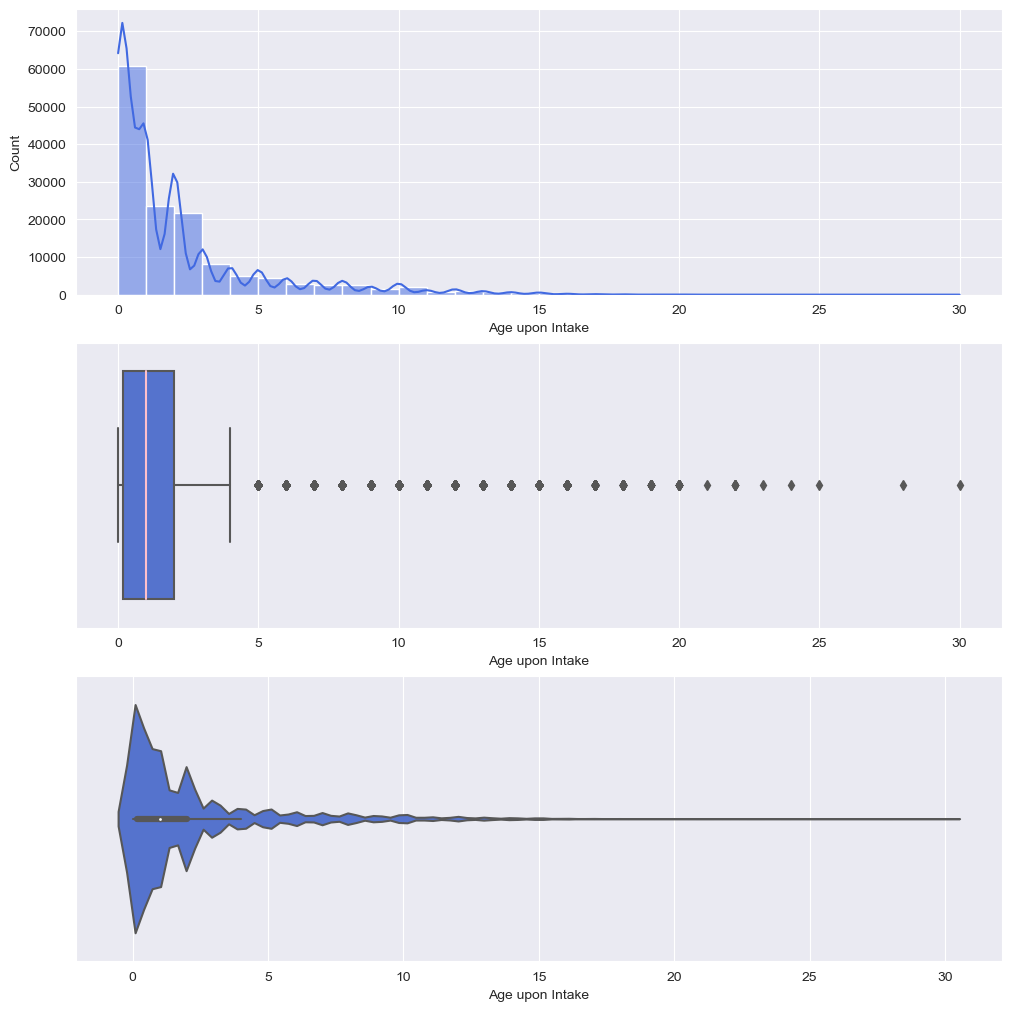

In [38]:
univariate_quantitive_stats ( intakes, "Age upon Intake" )

Statistics show us that most animals in shelter are "young", more than 50% of them are `under a one year old`. Long-livers are usually `outliers`.

,Title,Value
0,Minimal value,2013-10-01 07:51:00
1,Maximal value,2022-04-27 07:54:00
2,Range,3130
3,Interquartile range,1425
4,Average,2017-09-03
5,Median,2017-07-20
6,Mode,2014-07-09 12:58:00


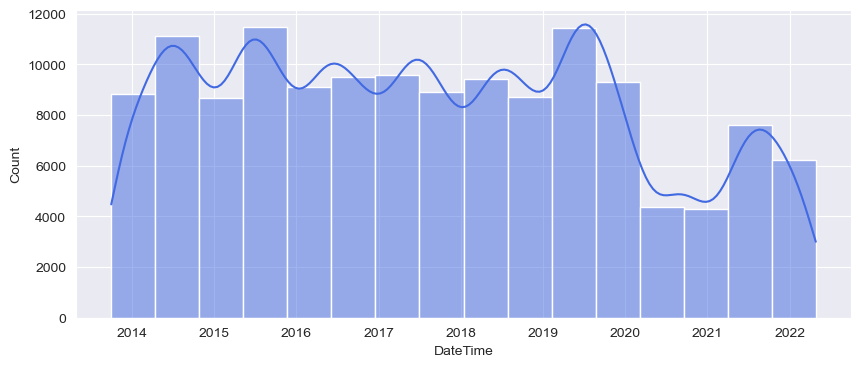

In [39]:
stats_datetime = pd . DataFrame ( np . array ( [
    [ "Minimal value", intakes [ "DateTime" ] . min ( ) ], 
    [ "Maximal value", intakes [ "DateTime" ] . max ( ) ], 
    [ "Range", ( intakes [ "DateTime" ] . max ( ) - intakes [ "DateTime" ] . min( ) ) . days ],
    [ "Interquartile range", int ( ( np . nanquantile ( intakes [ "DateTime" ], 0.75 ) - np . nanquantile ( intakes [ "DateTime" ], 0.25 ) ) . astype('timedelta64[D]') / np.timedelta64(1, 'D') ) ],
    [ "Average", intakes [ "DateTime" ] . mean ( ) . date ( ) ],
    [ "Median", intakes [ "DateTime" ] . median ( ) . date ( ) ],
    [ "Mode", pd . Timestamp ( stats . mode ( intakes [ "DateTime" ] ) [0][0] ) ],
    ]), columns = [ 'Title', 'Value' ] )

fig, ax1 = plt . subplots ( figsize = ( 10, 4 ) )
sns . histplot ( data = intakes, x = "DateTime", bins = 16, kde = True, ax = ax1, color = "royalblue" )

display ( stats_datetime )

In [40]:
# def date_to_int ( date ):
#     return date . timestamp ()

In [41]:
# fig, ax1 = plt . subplots ( figsize = ( 10, 4 ) )
# intakes_date_int = intakes . copy ( )
# intakes_date_int [ "DateTime" ] = intakes_date_int [ "DateTime" ] . apply ( date_to_int )
# _ = sns . boxplot ( data = intakes_date_int, x = "DateTime", ax = ax1, color = "royalblue", medianprops = {"color": "pink"} )

Date statistics are more difficult to come by. 
I have written out the main indicators ( `ranges are measured in days` ). 

The variance was harder to work with. I've tried converting all the dates in ints, but I'm not sure this is the right approach. So I left it commented out and hope when you check, you will tell me how it could have been done :)

In [42]:
def univariate_categorical_stats ( df, column ):
    stats_freq = pd . DataFrame ( data={
        'Frequency': df [ column ] .value_counts ( ),
        'Relative frequency': df [ column ] . value_counts ( normalize=True ), 
    })
    
    display ( stats_freq )
    
    fig, ( ax1, ax2 ) = plt . subplots ( 1, 2, figsize = ( 16,6 ) )
    
    sns . countplot ( data = df, x = column, order = df [ column ] . value_counts ( ) . index, ax = ax1)
    # adds labels above bars
    ax1 . bar_label ( ax1 . containers [0] )
    
    ax2 . pie ( stats_freq [ 'Frequency' ], labels = stats_freq . index, autopct = '%1.1f%%' )

Let's analyse the categorical data. 

What kind of animals and in what condition usually end up in a shelter, and in what condition they are removed from there.

,Column,Mode
0,Animal Type,Dog
1,Intake Type,Stray
2,Outcome Type,Adoption


,Frequency,Relative frequency
Dog,78135,0.563887
Cat,52373,0.377967
Other,7372,0.053202
Bird,661,0.004770
Livestock,24,0.000173


,Frequency,Relative frequency
Stray,95275,0.687583
Owner Surrender,28575,0.206221
Public Assist,8344,0.060217
Wildlife,5372,0.038769
Abandoned,740,0.005340
Euthanasia Request,259,0.001869


,Frequency,Relative frequency
Adoption,63506,0.457853
Transfer,40152,0.289480
Return to Owner,23014,0.165922
Euthanasia,9134,0.065852
Died,1300,0.009372
Rto-Adopt,873,0.006294
Disposal,628,0.004528
Missing,72,0.000519
Relocate,25,0.000180


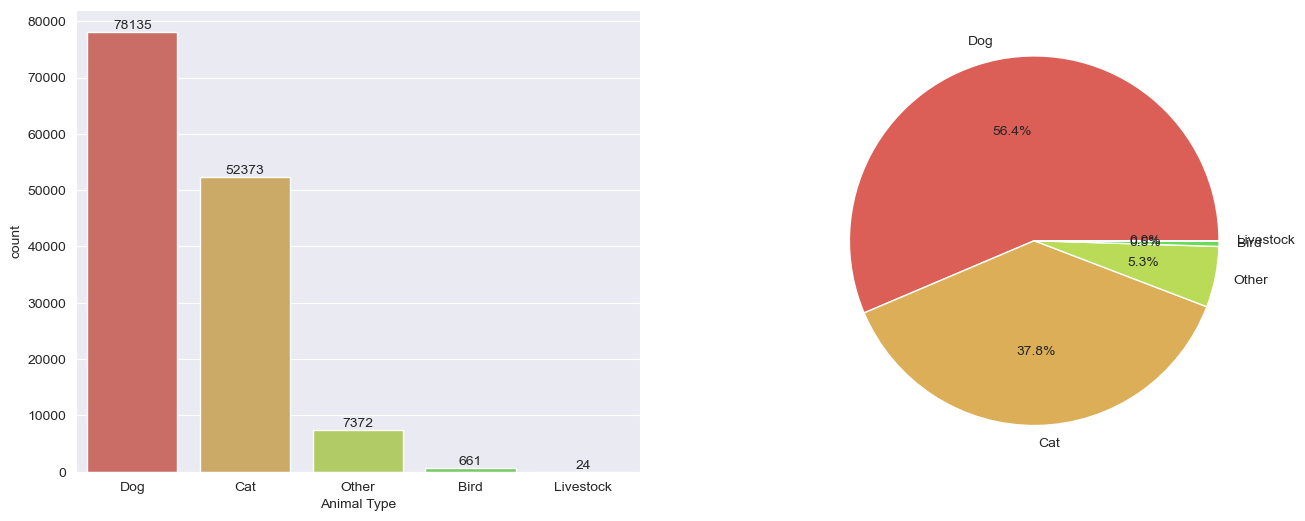

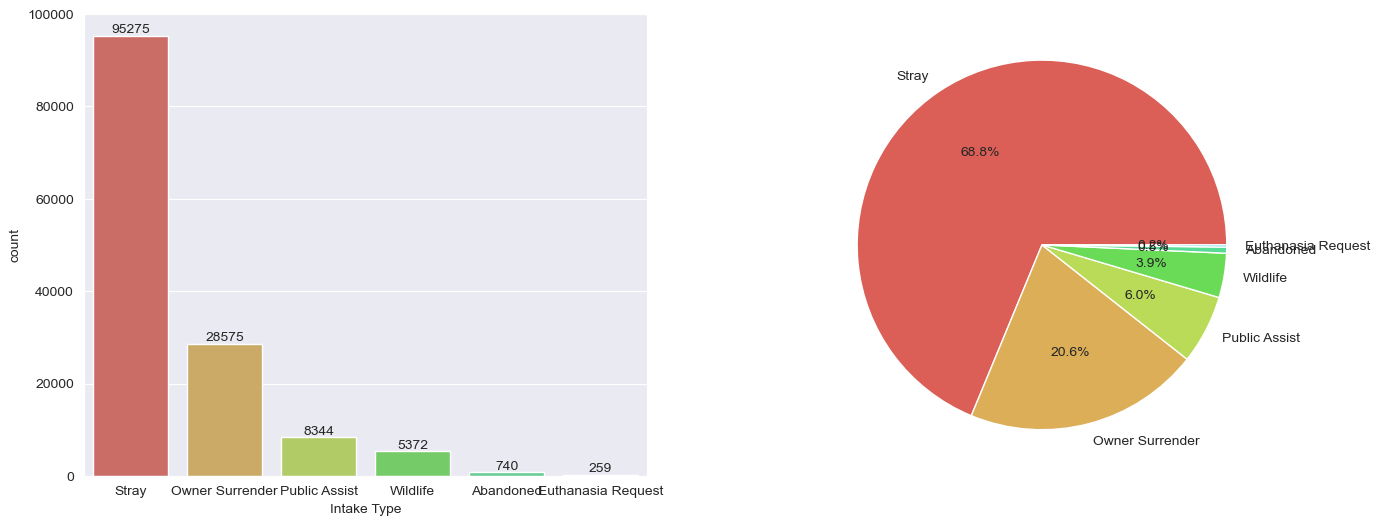

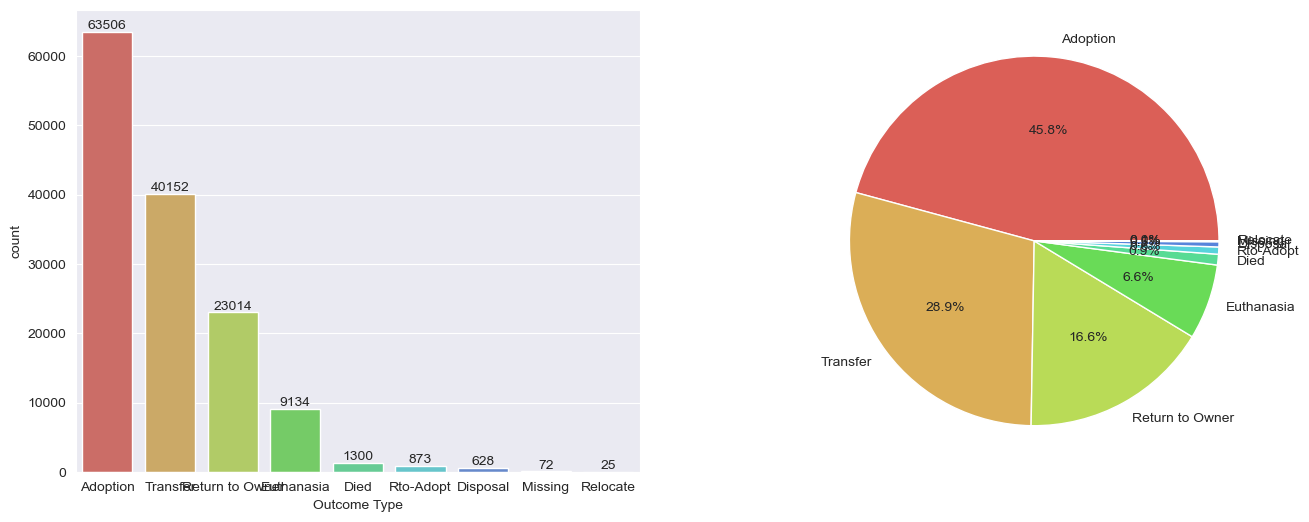

In [43]:
stats_mode = pd . DataFrame ( np . array ( [
    [ "Animal Type", stats . mode ( intakes [ "Animal Type" ] ) [0][0] ],
    [ "Intake Type", stats . mode ( intakes [ "Intake Type" ] ) [0][0] ],
    [ "Outcome Type", stats . mode ( outcomes [ "Outcome Type" ] ) [0][0] ]
    ] ), columns = [ "Column", "Mode" ] )
display ( stats_mode )
univariate_categorical_stats ( intakes, "Animal Type" )
univariate_categorical_stats ( intakes, "Intake Type" )
univariate_categorical_stats ( outcomes, "Outcome Type" )

Try to find a `possible correlation`. 

There is no "strong" correlations. We see that the greatest correlation between the columns **Sex** and **Is intacted**. It is probably because they can only receive two values each. 

I will demonstrate the correlation between the columns **Animal Type** and **Is intacted**. 

In [44]:
object_cols = intakes . select_dtypes ( [ 'category' ] ) . columns
intakes_num = intakes . copy ( )
intakes_num [ object_cols ] = intakes_num [ object_cols ] . apply ( lambda x : x . cat . codes )
corr = intakes_num . corr ( )
corr . style . background_gradient (cmap='coolwarm')

,Animal ID,Name,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color,Sex,Is Intacted
Animal ID,1.000000,-0.079058,-0.021287,-0.051460,-0.003562,-0.029100,-0.147480,-0.005789,-0.022144,-0.006764,0.110606
Name,-0.079058,1.000000,0.179723,-0.338646,-0.032127,0.057049,0.313155,0.081870,0.084593,0.216050,-0.027054
Found Location,-0.021287,0.179723,1.000000,-0.296614,0.005521,0.037545,0.080741,0.025092,0.042787,0.078288,-0.002368
Intake Type,-0.051460,-0.338646,-0.296614,1.000000,-0.025604,0.142414,-0.133149,-0.034179,-0.037792,-0.162377,-0.007938
Intake Condition,-0.003562,-0.032127,0.005521,-0.025604,1.000000,0.047423,-0.082320,0.001764,-0.015033,-0.054516,-0.024765
Animal Type,-0.029100,0.057049,0.037545,0.142414,0.047423,1.000000,0.089141,0.036124,0.055400,-0.225466,-0.330302
Age upon Intake,-0.147480,0.313155,0.080741,-0.133149,-0.082320,0.089141,1.000000,0.047443,0.067239,0.082600,-0.241269
Breed,-0.005789,0.081870,0.025092,-0.034179,0.001764,0.036124,0.047443,1.000000,0.030317,0.058284,0.041984
Color,-0.022144,0.084593,0.042787,-0.037792,-0.015033,0.055400,0.067239,0.030317,1.000000,0.038050,0.042800
Sex,-0.006764,0.216050,0.078288,-0.162377,-0.054516,-0.225466,0.082600,0.058284,0.038050,1.000000,0.458078


In [45]:
def bivariate_categorical_stats ( df, categorical1, categorical2 ):
    frequency_table = pd . crosstab ( df [ categorical1 ], df [ categorical2 ] )
    
    fig, (ax1, ax2) = plt . subplots ( 1, 2, figsize=(16,6) )
    
    sns . heatmap ( frequency_table, cmap = 'Blues', annot = True, fmt = 'g', ax = ax1)
    sns . heatmap ( frequency_table.div(len(df)), cmap = 'Blues', annot = True, fmt = 'g', ax = ax2)

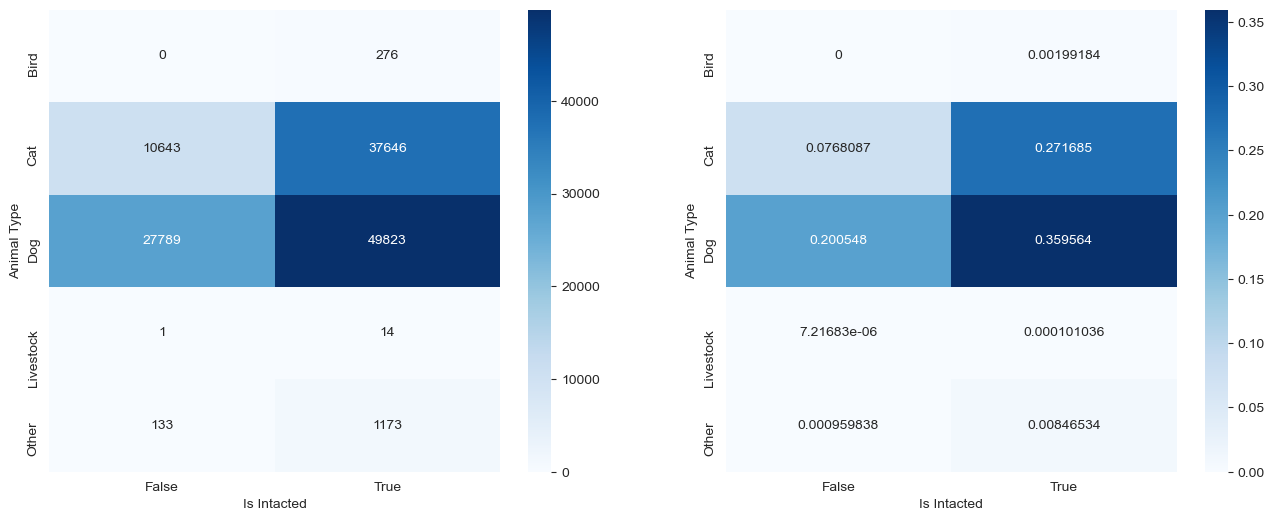

In [46]:
bivariate_categorical_stats ( intakes, "Animal Type", "Is Intacted" )

We see that the highest ratios of neutered/intacted animals are in cats and dogs, which is usual. However, I cannot call this correlation `"strong"` enough.

### QUESTIONS

#### 1) Does the Outcome Type depend on the Intake Type?

First of all let's merge tables via column *Animal ID*.

In [47]:
display ( intakes . nunique ( ) )
intakes_unique_id = intakes . copy ( ) . drop_duplicates ( subset = "Animal ID" )
display ( intakes_unique_id . shape )
outcomes_unique_id = outcomes . copy ( ) . drop_duplicates ( subset = "Animal ID" )
display ( outcomes_unique_id . shape )

Animal ID           123890
Name                 23542
DateTime             97442
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Age upon Intake         44
Breed                 2740
Color                  616
Sex                      2
Is Intacted              2
dtype: int64

(123890, 12)

(124058, 12)

In [48]:
intakes_outcomes = intakes_unique_id . merge ( outcomes_unique_id, how = "inner", on = "Animal ID" )
display ( intakes_outcomes . head ( 10 ) )
display ( intakes_outcomes . shape )

,Animal ID,Name_x,DateTime_x,Found Location,Intake Type,Intake Condition,Animal Type_x,Age upon Intake,Breed_x,Color_x,...,DateTime_y,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Age upon Outcome,Breed_y,Color_y,Sex_y,Is Intacted_y
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,2.00,Beagle Mix,Tricolor,...,2019-01-08 15:11:00,2017-01-03,Transfer,Partner,Dog,2.00,Beagle Mix,Tricolor,Male,False
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,8.00,English Springer Spaniel,White/Liver,...,2015-07-05 15:13:00,2007-07-05,Return to Owner,NaN,Dog,8.00,English Springer Spaniel,White/Liver,Female,False
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,0.92,Basenji Mix,Sable/White,...,2016-04-21 17:17:00,2015-04-17,Return to Owner,NaN,Dog,1.00,Basenji Mix,Sable/White,Male,False
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,0.08,Domestic Shorthair Mix,Calico,...,2013-10-21 11:39:00,2013-09-21,Transfer,Partner,Cat,0.08,Domestic Shorthair Mix,Calico,Female,True
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,4.00,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,...,2014-07-02 14:16:00,2010-06-29,Return to Owner,NaN,Dog,4.00,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,False
5,A743852,Odin,2017-02-18 12:46:00,Austin (TX),Owner Surrender,Normal,Dog,2.00,Labrador Retriever Mix,Chocolate,...,2017-02-21 17:44:00,2015-02-18,Return to Owner,NaN,Dog,2.00,Labrador Retriever Mix,Chocolate,Male,False
6,A635072,Beowulf,2019-04-16 09:53:00,415 East Mary Street in Austin (TX),Public Assist,Normal,Dog,6.00,Great Dane Mix,Black,...,2019-04-18 13:45:00,2012-06-03,Return to Owner,NaN,Dog,6.00,Great Dane Mix,Black,Male,False
7,A844350,*Ella,2021-10-15 11:40:00,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,0.50,Domestic Shorthair,Brown Tabby,...,2021-10-20 18:51:00,2021-04-15,Adoption,NaN,Cat,0.50,Domestic Shorthair,Brown Tabby,Female,False
8,A708452,Mumble,2015-07-30 14:37:00,Austin (TX),Public Assist,Normal,Dog,2.00,Labrador Retriever Mix,Black/White,...,2015-08-04 18:17:00,2013-07-28,Return to Owner,NaN,Dog,2.00,Labrador Retriever Mix,Black/White,Male,False
9,A818975,NaN,2020-06-18 14:53:00,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,0.08,Domestic Shorthair,Cream Tabby,...,2020-07-23 15:54:00,2020-05-19,Adoption,Foster,Cat,0.17,Domestic Shorthair,Cream Tabby,Male,False


(123244, 23)

Look at `correlation` between columns. It doesn't look `"strong"`.

In [49]:
intakes_outcomes_num = intakes_outcomes . copy ( )
intakes_outcomes_num [ [ "Outcome Type", "Intake Type" ] ] = intakes_outcomes_num [ [ "Outcome Type", "Intake Type" ]  ] . apply ( lambda x : x . cat . codes )
corr = intakes_outcomes_num . corr ( )
corr . style . background_gradient (cmap='coolwarm')

,Intake Type,Age upon Intake,Outcome Type,Age upon Outcome
Intake Type,1.000000,-0.137330,0.076250,-0.134266
Age upon Intake,-0.137330,1.000000,0.093424,0.993771
Outcome Type,0.076250,0.093424,1.000000,0.087391
Age upon Outcome,-0.134266,0.993771,0.087391,1.000000


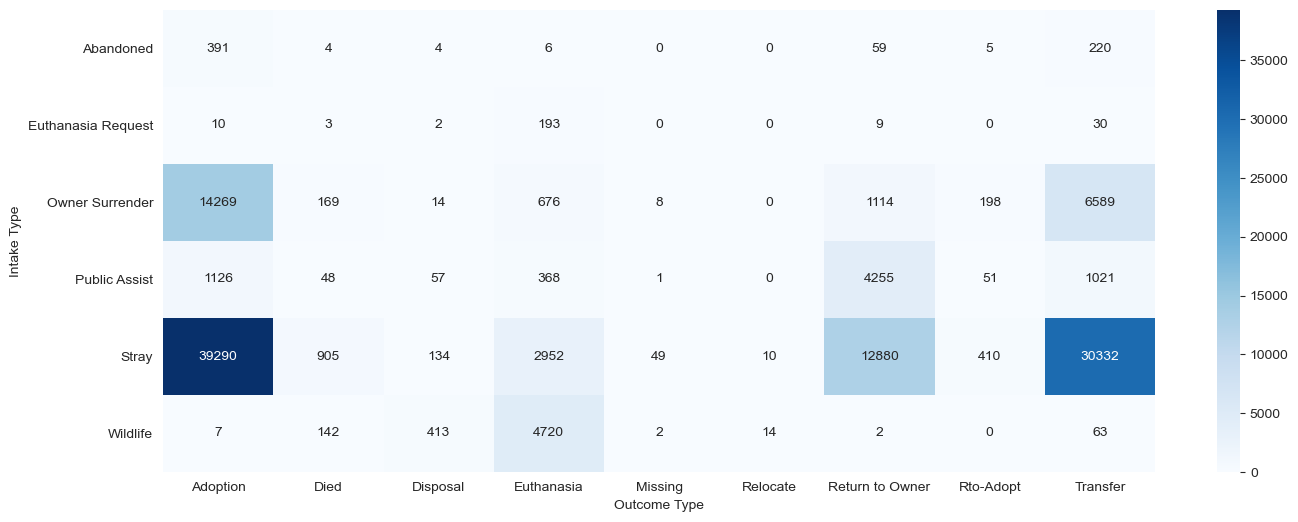

In [50]:
frequency_table = pd . crosstab ( intakes_outcomes [ "Intake Type" ], intakes_outcomes [ "Outcome Type" ] )
    
fig, (ax1) = plt . subplots ( 1, 1, figsize=(16,6) )
    
_ = sns . heatmap ( frequency_table, cmap = 'Blues', annot = True, fmt = 'g', ax = ax1)

The values are generally not dependent. What stands out is the fact that `stray animals` are more likely to be `adopted` or `transfered`.

#### 2) Does the age of the animal play a role in adoption?

In [51]:
def bivariate_cat_quant_stats ( df, categorical, continuous ):
    n_categories = df [ categorical ] . nunique ( )
    fig, axes = plt . subplots ( 2, 2, figsize = ( 10, 10 ) )
    
    box_plot = sns . boxplot ( data = df, x = categorical, y = continuous, ax = axes[0][0])
    medians = df . groupby ( categorical ) [ continuous ] . median ( )
    vertical_offset = df [ continuous ] . max ( ) * 0.015

    for xtick in box_plot.get_xticks():
        box_plot . text ( xtick, medians [ xtick ] + vertical_offset, medians [ xtick ], horizontalalignment = 'center')
    
    sns . violinplot ( data = df, x = categorical, y = continuous, ax = axes[0][1])
    
    sns . histplot(
        data = df, x = continuous, bins = 20, hue = categorical, multiple = 'stack',
        palette = palette [ :n_categories ], ax = axes[1][0]
    ) . set ( title = 'Stacked histogram' )        
    
    sns . histplot(
        data = df, x = continuous, bins = 20, hue = categorical, multiple = 'stack', stat = 'probability', 
        common_norm = False, palette = palette [ :n_categories ], ax = axes[1][1]
    ) . set ( title = 'Normalized stacked histogram' )

,Title,Value
0,Minimal value,0.0
1,Maximal value,30.0
2,Range,30.0
3,Interquartile range,1.75
4,Average,2.0709100935685916
5,Median,1.0
6,Mode,1.0
7,Variance,8.224938757651866
8,Skewness,2.3324346985913897
9,Kurtosis,5.907162707144524


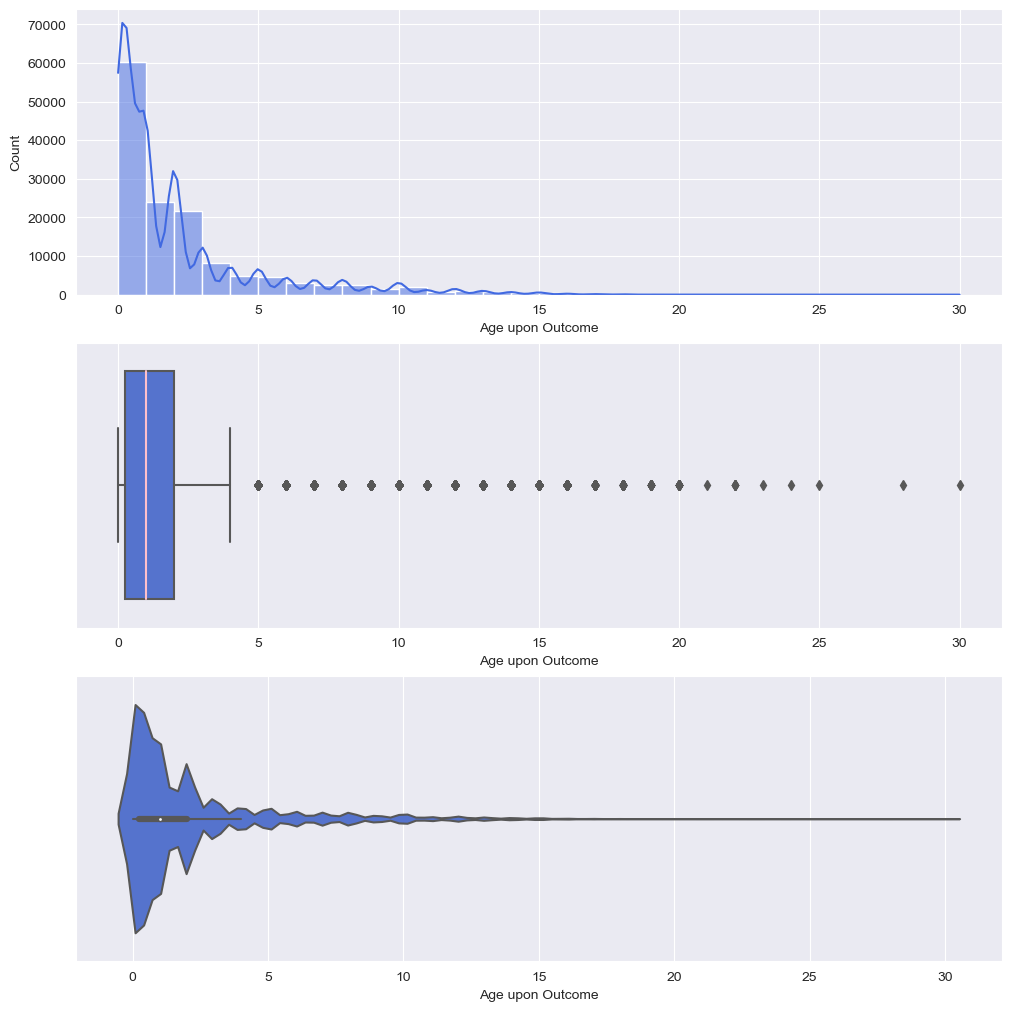

In [52]:
univariate_quantitive_stats ( outcomes, "Age upon Outcome" )

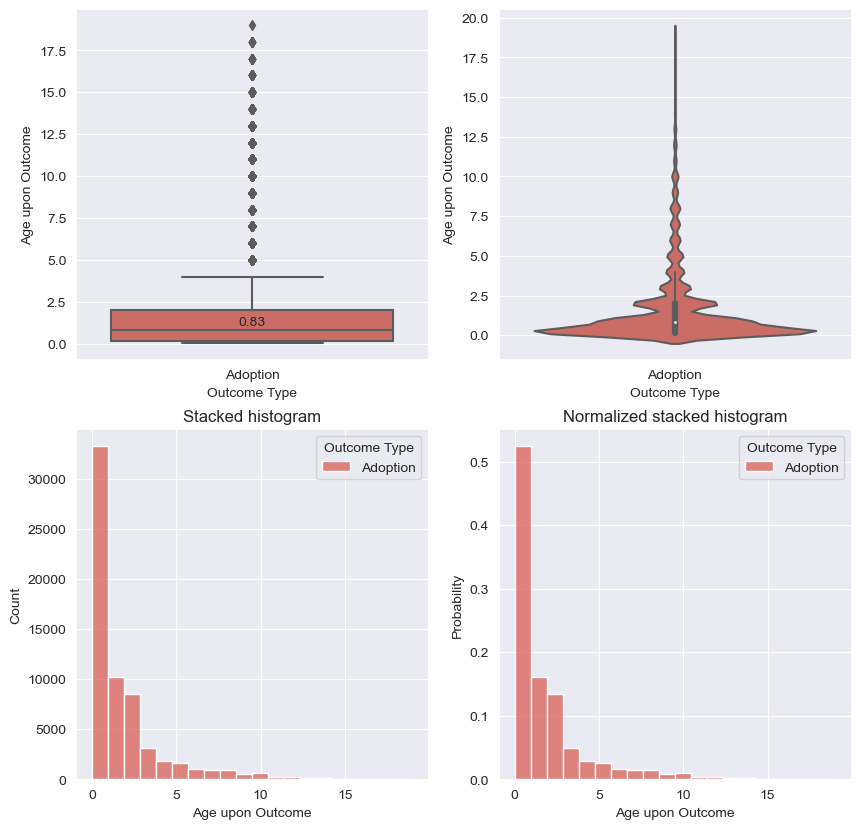

In [53]:
adoption = outcomes [ outcomes [ "Outcome Type" ] == "Adoption" ] . copy ( )
adoption [ "Outcome Type" ] = "Adoption"
bivariate_cat_quant_stats ( adoption, "Outcome Type", "Age upon Outcome" )

We can observe that the younger the animal, the more often it is adopted. 

However, if we look at similar visualisations when we analysed the column **Age upon Outcome**, we see that the visualisations are `extremely similar`. This tells us that the animals are adopted `relatively evenly`. 

Logically, if there are more young animals, they are more likely to be adopted, but older animals are also adopted. Nevertheless, there is a slight influence ( median shifted to the left == `young animals are a little higher priority` ) 

#### 3) Is the intake of animals constant throughout the year or are there periods with higher/lower loads?

In [54]:
intakes_month = intakes . copy ( )
intakes_month [ "Month" ] = pd . DatetimeIndex ( intakes_month [ "DateTime" ] ) . month 
intakes_month

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color,Sex,Is Intacted,Month
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,2.00,Beagle Mix,Tricolor,Male,False,1
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,8.00,English Springer Spaniel,White/Liver,Female,False,7
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,0.92,Basenji Mix,Sable/White,Male,True,4
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,0.08,Domestic Shorthair Mix,Calico,Female,True,10
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,4.00,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138580,A856010,Snow,2022-04-27 07:54:00,4434 Frontier Trail in Austin (TX),Owner Surrender,Sick,Cat,0.08,Domestic Shorthair,White,Female,True,4
138581,A855811,A855811,2022-04-23 13:32:00,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,0.17,Labrador Retriever Mix,Brown Brindle/Black,Male,True,4
138582,A855815,A855815,2022-04-23 13:32:00,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,0.17,Labrador Retriever Mix,Brown/Black,Female,True,4
138583,A855818,*Pumbaa,2022-04-23 14:44:00,10827 Fm 1820 in Travis (TX),Stray,Normal,Dog,3.00,Anatol Shepherd/German Shepherd,Brown,Male,True,4


,Frequency,Relative frequency
6,13419,0.096843
5,13395,0.096669
10,13111,0.094620
7,12331,0.088991
9,12047,0.086941
8,11860,0.085592
4,11251,0.081197
11,10993,0.079335
3,10944,0.078981
12,10105,0.072926


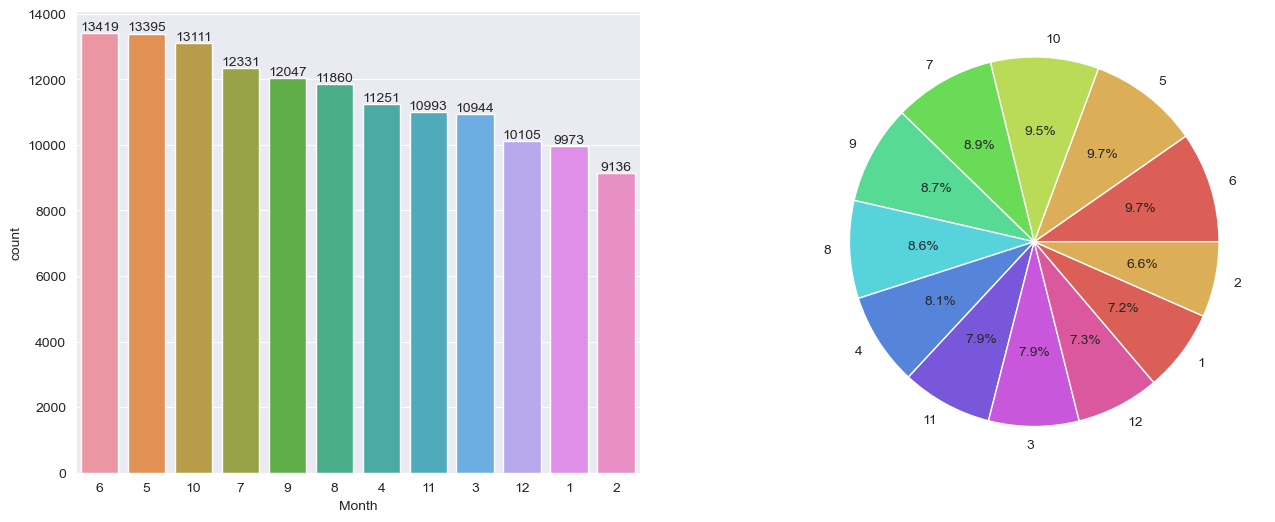

In [55]:
univariate_categorical_stats ( intakes_month, "Month" )

During the winter months, fewer animals are taken in. In autumn and spring the most. However, this difference is not big enough ( `next to 33 percent` ).

In [56]:
display ( intakes . info ( ) )
display ( outcomes . info ( ) )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  category      
 1   Name              97280 non-null   category      
 2   DateTime          138565 non-null  datetime64[ns]
 3   Found Location    138565 non-null  category      
 4   Intake Type       138565 non-null  category      
 5   Intake Condition  138565 non-null  category      
 6   Animal Type       138565 non-null  category      
 7   Age upon Intake   138557 non-null  float64       
 8   Breed             138562 non-null  category      
 9   Color             138565 non-null  category      
 10  Sex               127498 non-null  category      
 11  Is Intacted       127498 non-null  category      
dtypes: category(10), datetime64[ns](1), float64(1)
memory usage: 13.9 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138727 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138727 non-null  category      
 1   Name              97465 non-null   category      
 2   DateTime          138727 non-null  datetime64[ns]
 3   Date of Birth     138727 non-null  datetime64[ns]
 4   Outcome Type      138704 non-null  category      
 5   Outcome Subtype   63417 non-null   category      
 6   Animal Type       138727 non-null  category      
 7   Age upon Outcome  138722 non-null  float64       
 8   Breed             138724 non-null  category      
 9   Color             138727 non-null  category      
 10  Sex               127676 non-null  category      
 11  Is Intacted       127676 non-null  category      
dtypes: category(9), datetime64[ns](2), float64(1)
memory usage: 12.0 MB


None

In [57]:
locations = pd . read_csv ( "locations.csv" )

In [58]:
display ( locations . head ( 5 ) )
display ( locations . shape )

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
0,A855691,"811 BURNSALL GATES DR78660\n(30.417121, -97.64...",Yes (come to the shelter),04/22/2022,Dog,Pit Bull Mix,Gray/White,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
1,A855620,8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...,Yes (come to the shelter),04/20/2022,Dog,Cairn Terrier Mix,Tan,Intact Male,3 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
2,A855431,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Male,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
3,A855432,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Female,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
4,A855461,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No (contact for more info),04/18/2022,Cat,Siamese,Flame Point,Intact Female,6 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...


(102, 10)

In [59]:
locations [ "At AAC" ] . unique ( )

array(['Yes (come to the shelter)', 'No (contact for more info)'],
      dtype=object)

In [60]:
locations_outcomes = locations . merge ( outcomes_unique_id, how = "inner", on = "Animal ID" )
locations_outcomes . head ( )

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color_x,Sex_x,Age,Image Link,...,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Age upon Outcome,Breed,Color_y,Sex_y,Is Intacted
0,A720883,10222 MISSEL\nTHRUSH AUSTIN 78750,Yes (come to the shelter),04/21/2022,Cat,Domestic Shorthair Mix,Brown Tabby/White,Spayed Female,6 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A72...,...,2016-02-20 18:19:00,2015-07-04,Adoption,NaN,Cat,0.58,Domestic Shorthair Mix,Brown Tabby/White,Female,False
1,A855649,7224 NORTHEAST DRIVE\nAUSTIN 78723\n(30.321954...,Yes (come to the shelter),04/21/2022,Dog,Yorkshire Terrier Mix,Gold,Intact Female,1 year,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...,...,2022-04-25 12:25:00,2021-04-21,Transfer,Partner,Dog,1.00,Yorkshire Terrier Mix,Gold,Female,True
2,A854552,"641 TILLERY STREET\nAUSTIN 78702\n(30.257866, ...",Yes (come to the shelter),04/21/2022,Dog,Pit Bull Mix,Black/White,Intact Female,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...,...,2022-04-06 15:17:00,2020-04-05,Return to Owner,NaN,Dog,2.00,Pit Bull Mix,Black/White,Female,True
3,A855743,"7000 DECKER LN\nAUSTIN 78724\n(30.296097, -97....",Yes (come to the shelter),04/22/2022,Cat,Domestic Shorthair,Brown Tabby,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...,...,2022-04-26 16:18:00,2020-04-22,Adoption,NaN,Cat,2.00,Domestic Shorthair,Brown Tabby,Male,False
4,A855746,TAYLOR LANE78653,Yes (come to the shelter),04/22/2022,Dog,Shih Tzu,White/Tan,Intact Male,7 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...,...,2022-04-26 17:27:00,2021-08-22,Adoption,NaN,Dog,0.67,Shih Tzu,White/Tan,Male,False


It is not quite clear what is stored in the `location` table. 

It seems to me that there are records of animals that are in the shelter right now. However, how to analyse this information in an interesting way, I have no idea. Also, I am not sure if I am not mistaking. Therefore this table will not be touched.

#### 4) How often are animals spayed at the shelter?

In [61]:
def spaying_in_shelter ( intakes, outcomes ):
    if intakes == True and outcomes == False:
        return "Was sterilised in shelter"
    elif intakes == True and outcomes == True:
        return "Wasn't sterilised in shelter"
    elif intakes == False and outcomes == False:
        return "Was sterilised before shelter"
    else:
        return "Mistake in data"

In [62]:
sterilized_info = intakes_outcomes . apply ( lambda x : spaying_in_shelter ( x [ "Is Intacted_x" ], x [ "Is Intacted_y" ] ), axis = 1 )
sterilized_info = sterilized_info . to_frame ( name = "Was sterilized" )

,Frequency,Relative frequency
Was sterilised in shelter,50121,0.406681
Wasn't sterilised in shelter,33110,0.268654
Was sterilised before shelter,28914,0.234608
Mistake in data,11099,0.090057


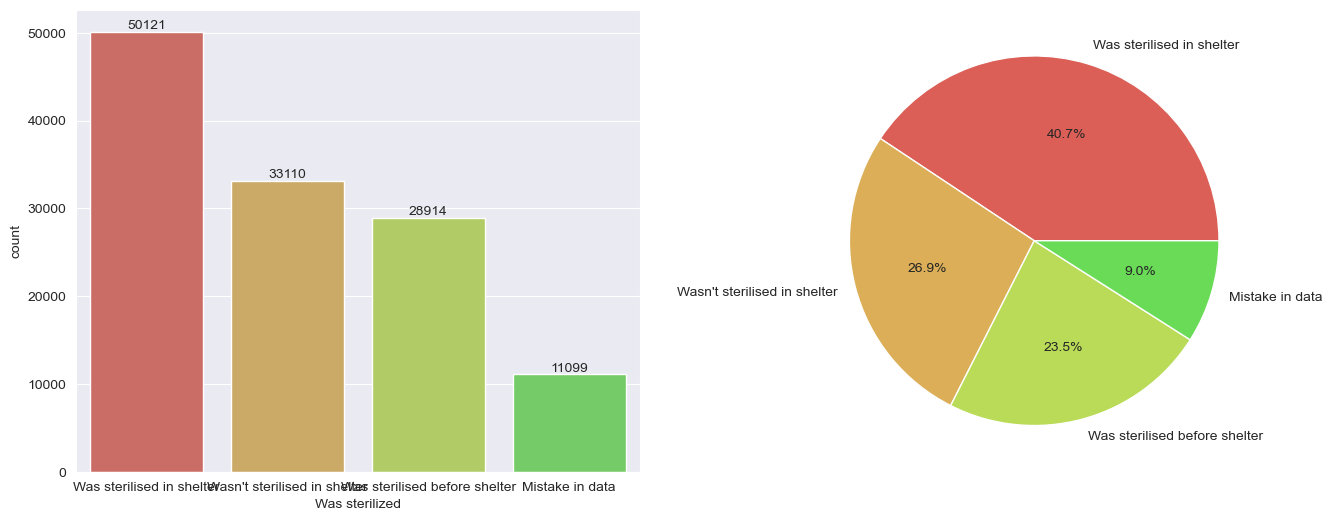

In [63]:
univariate_categorical_stats ( sterilized_info, "Was sterilized" )

In general, the shelter keeps an eye on this component. Approximately `two-thirds` of the animals that were not sterilised before the shelter have been sterilised at the shelter. Also note that not all animals can be sterilised (e.g. birds).

In [64]:
intakes_outcomes . info ( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123244 entries, 0 to 123243
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         123244 non-null  object        
 1   Name_x            82452 non-null   category      
 2   DateTime_x        123244 non-null  datetime64[ns]
 3   Found Location    123244 non-null  category      
 4   Intake Type       123244 non-null  category      
 5   Intake Condition  123244 non-null  category      
 6   Animal Type_x     123244 non-null  category      
 7   Age upon Intake   123241 non-null  float64       
 8   Breed_x           123241 non-null  category      
 9   Color_x           123244 non-null  category      
 10  Sex_x             112210 non-null  category      
 11  Is Intacted_x     112210 non-null  category      
 12  Name_y            82452 non-null   category      
 13  DateTime_y        123244 non-null  datetime64[ns]
 14  Date

#### 5) What were the conditions of the animals that were eventually euthanised?

,Frequency,Relative frequency
Wildlife,4720,0.529445
Stray,2952,0.331127
Owner Surrender,676,0.075827
Public Assist,368,0.041279
Euthanasia Request,193,0.021649
Abandoned,6,0.000673


,Frequency,Relative frequency
Normal,4340,0.486820
Injured,2197,0.246439
Sick,2159,0.242176
Nursing,95,0.010656
Aged,78,0.008749
Other,24,0.002692
Medical,8,0.000897
Feral,5,0.000561
Behavior,4,0.000449
Neonatal,4,0.000449


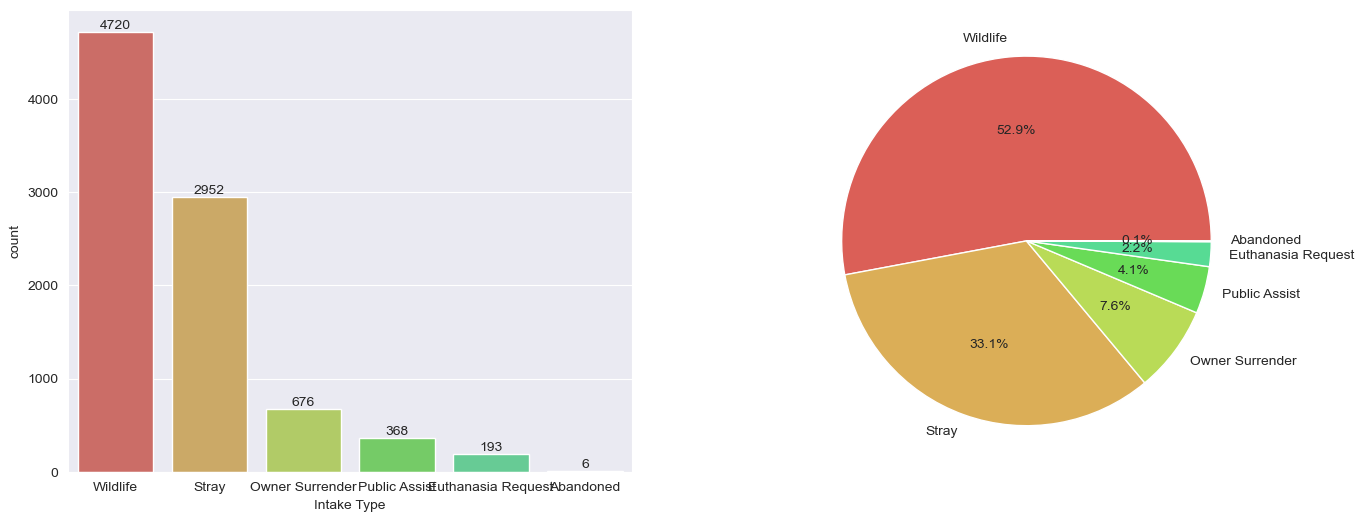

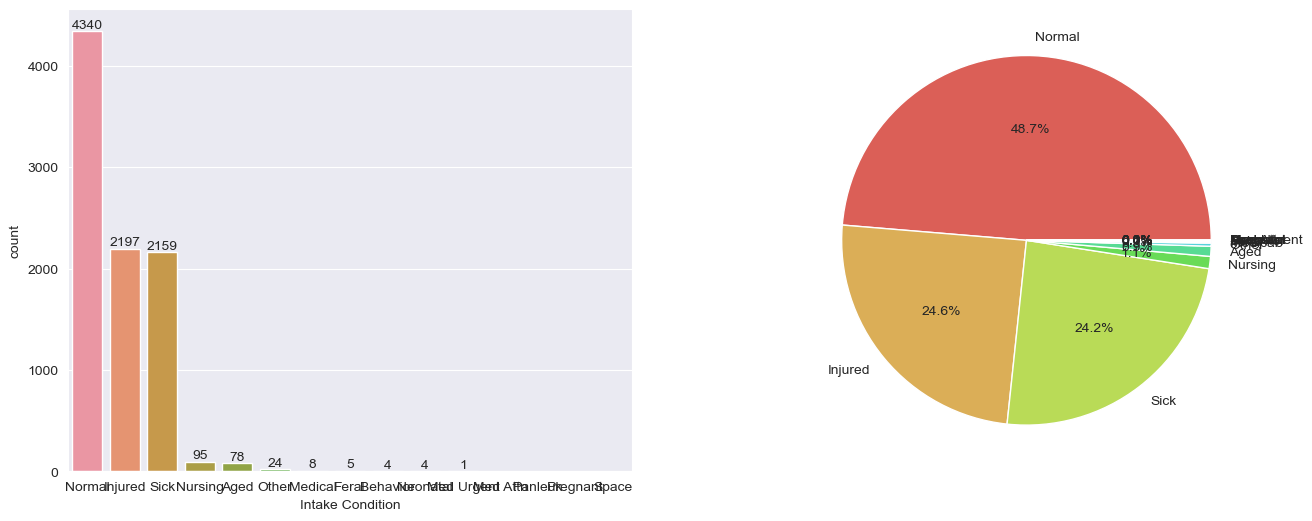

In [65]:
euthanasia = intakes_outcomes [ intakes_outcomes [ "Outcome Type" ] == "Euthanasia" ]
univariate_categorical_stats ( euthanasia, "Intake Type" )
univariate_categorical_stats ( euthanasia, "Intake Condition" )

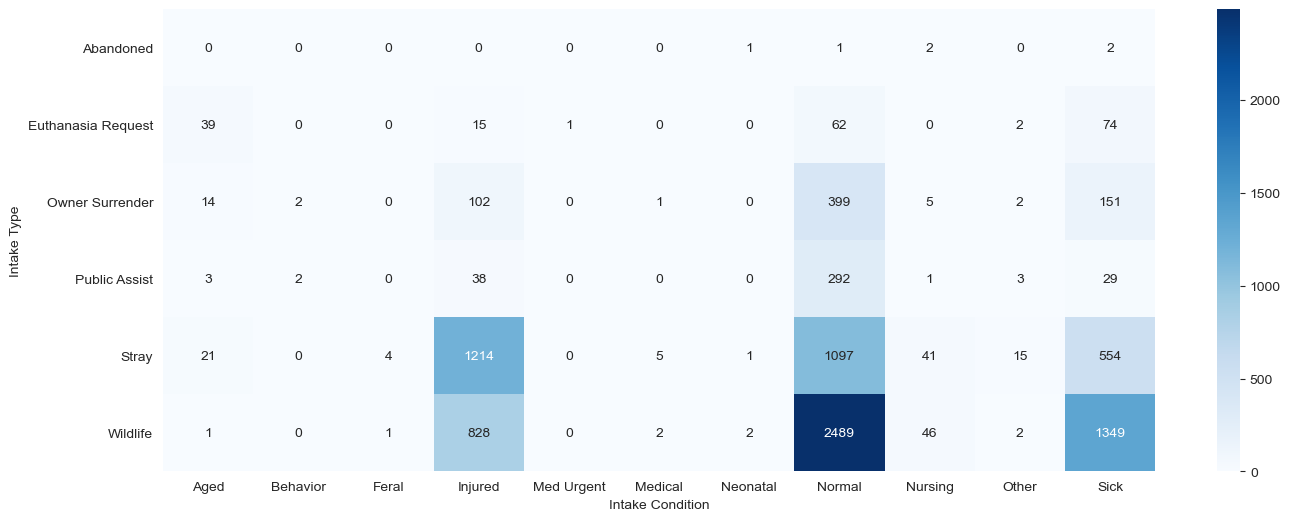

In [66]:
frequency_table = pd . crosstab ( euthanasia [ "Intake Type" ], euthanasia [ "Intake Condition" ] )
    
fig, (ax1) = plt . subplots ( 1, 1, figsize=(16,6) )
    
_ = sns . heatmap ( frequency_table, cmap = 'Blues', annot = True, fmt = 'g', ax = ax1)

Animals from the `wildlife` were most often euthanized, even though they may have been in a `normal` condition at the shelter. It is probably hard for them to live `outside their environment`.

#### 6) How did animal types change over the years?

!!! I have no idea what happened and why there is a lot of blank space in my visualisation at the beginning :( 🧑‍

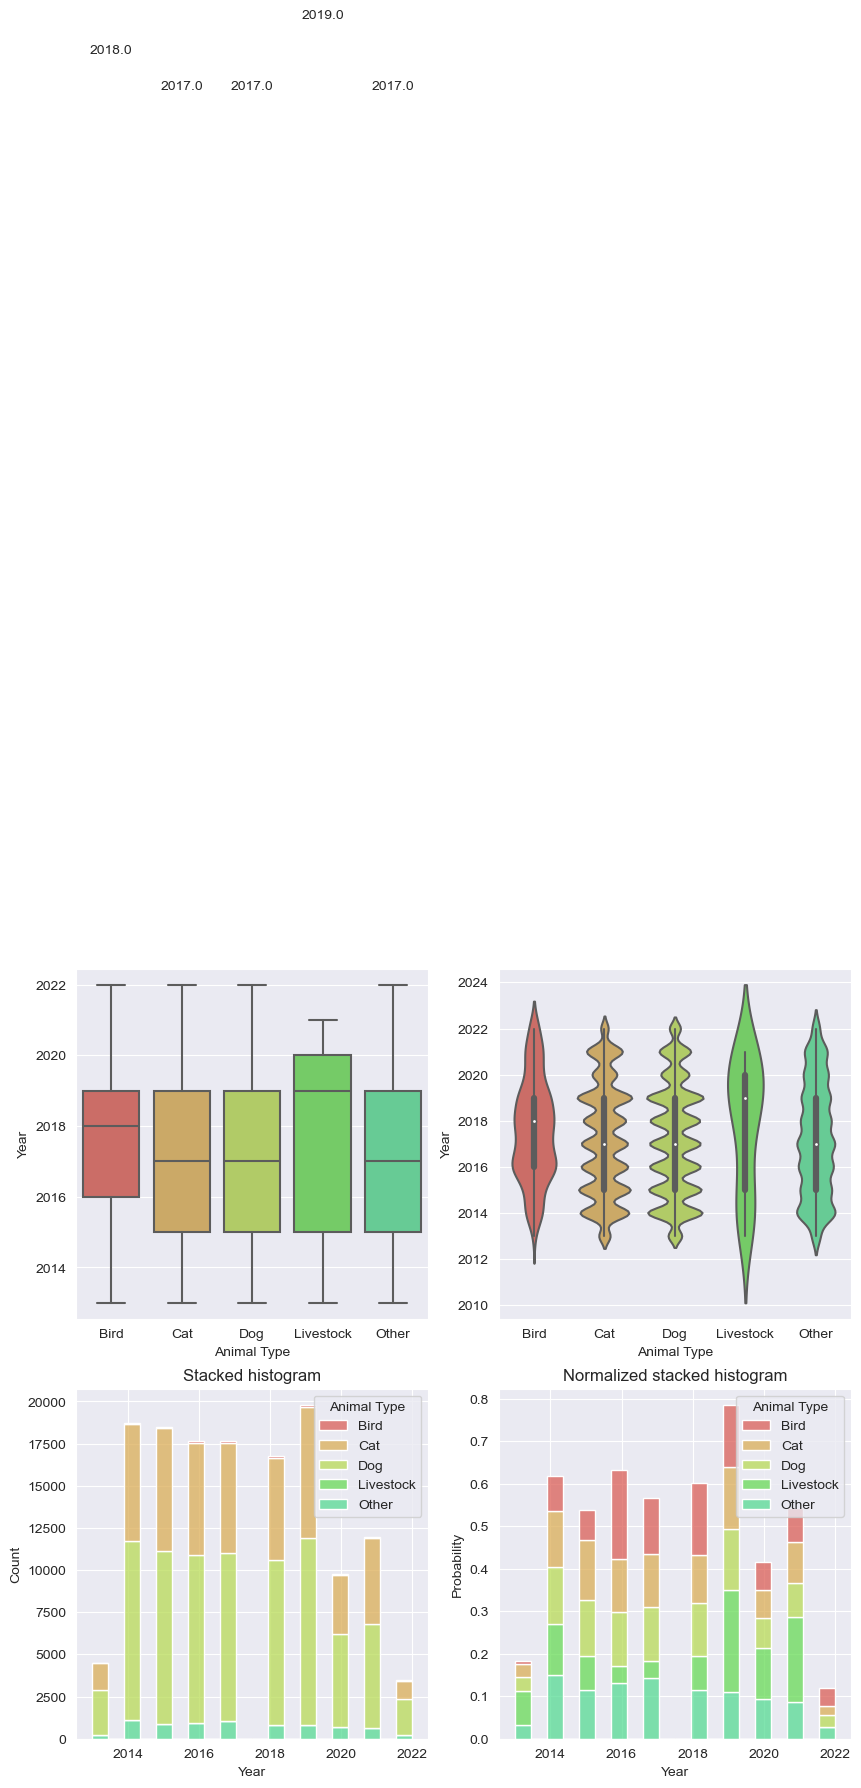

In [67]:
outcomes_year = outcomes . copy ( )
outcomes_year [ "Year" ] = pd . DatetimeIndex ( outcomes_year [ "DateTime" ] ) . year 
bivariate_cat_quant_stats ( outcomes_year, "Animal Type", "Year" )

In general, the type of animals in the shelter is evenly distributed over the years. The only animals that stand out are the `livestock`, which have become `more frequent by 2020`.

### That's all :)